=== Quadratic Dataset ===
Accuracy: 0.97
Confusion Matrix:
 [[11  3]
 [ 0 86]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.97      1.00      0.98        86

    accuracy                           0.97       100
   macro avg       0.98      0.89      0.93       100
weighted avg       0.97      0.97      0.97       100



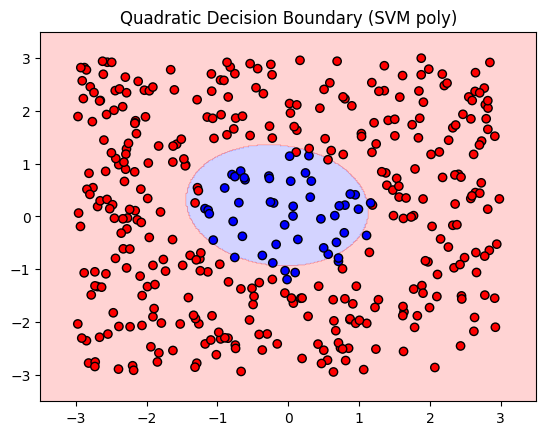

In [3]:
# Exercise 1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Generate quadratic dataset
rng = np.random.RandomState(42)
X = rng.uniform(-3, 3, size=(400, 2))
y = (X[:,0]**2 + X[:,1]**2 > 1.2**2).astype(int)  # inside circle=0, outside=1

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# 3. Train SVM with polynomial kernel (degree=2)
model = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=2, probability=True))
model.fit(X_train, y_train)

# 4. Evaluation
y_pred = model.predict(X_test)
print("=== Quadratic Dataset ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 5. Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-3.5, 3.5, 400), np.linspace(-3.5, 3.5, 400))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap="bwr")
plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr", edgecolor="k")
plt.title("Quadratic Decision Boundary (SVM poly)")
plt.show()


In [7]:
# Exercise 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load dataset
file_path = "/content/spam.csv"   # <-- Change to /content/ if in Colab
data = pd.read_csv(file_path, encoding="latin-1")

# Keep only needed columns
data = data[["v1", "v2"]]
data.columns = ["label", "message"]

# Encode target: ham=0, spam=1
data["label"] = data["label"].map({"ham":0, "spam":1})

# 2. Features and target
X = data["message"]
y = data["label"]

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4. Create pipeline: text vectorizer + SVM
model = make_pipeline(CountVectorizer(), SVC(kernel="linear"))
model.fit(X_train, y_train)

# 5. Evaluation
y_pred = model.predict(X_test)
print("=== Spam Classification ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 6. Test with new examples
examples = [
    "Hey, are we still meeting for lunch?",
    "Congratulations, you have won $1000 cash prize"
]
pred = model.predict(examples)

print("\nSample Predictions:")
for text, label in zip(examples, pred):
    print(f"{text} -> {'SPAM' if label==1 else 'NOT SPAM'}")


=== Spam Classification ===
Accuracy: 0.9755922469490309
Confusion Matrix:
 [[1197    5]
 [  29  162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1202
           1       0.97      0.85      0.91       191

    accuracy                           0.98      1393
   macro avg       0.97      0.92      0.95      1393
weighted avg       0.98      0.98      0.97      1393


Sample Predictions:
Hey, are we still meeting for lunch? -> NOT SPAM
Congratulations, you have won $1000 cash prize -> SPAM
